In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
dates_to_visualize = [
                                                                                            "2018-09", "2018-10", "2018-11", "2018-12",
    "2019-01", "2019-02", "2019-03", "2019-04", "2019-05", "2019-06", "2019-07", "2019-08", "2019-09", "2019-10", "2019-11", "2019-12",
    "2020-01", "2020-02", "2020-03", "2020-04", "2020-05", "2020-06", "2020-07", "2020-08", "2020-09", "2020-10", "2020-11", "2020-12",
    "2021-01", "2021-02", "2021-03", "2021-04", "2021-05", "2021-06", "2021-07", "2021-08", "2021-09", "2021-10", "2021-11", "2021-12",
    "2022-01", "2022-02", "2022-03", "2022-04", "2022-05", "2022-06", "2022-07", "2022-08", "2022-09", "2022-10", "2022-11", "2022-12",
    "2023-01", "2023-02", "2023-03", "2023-04", "2023-05", "2023-06", "2023-07", "2023-08", "2023-09", "2023-10", "2023-11", "2023-12",
    "2024-01", "2024-02", "2024-03", "2024-04", 
]

In [3]:
available_data_files = list(Path("../data/httparchive_metrics/nel_config").glob("*.parquet"))

used_data_files = list(filter(lambda file: file.stem.split("_")[-1] in dates_to_visualize, available_data_files))
used_data_files

[WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2018-09.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2018-10.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2018-11.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2018-12.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-02.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-03.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-04.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-05.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-06.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-07.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-08.parquet'),
 WindowsPath('../data

### Failure fraction configuration over months


In [4]:
# Pick out the Failure Fraction files
ma_files = list(filter(lambda file: file.stem[:file.stem.rfind("_")] == 'max_age', used_data_files))
ma_files

[WindowsPath('../data/httparchive_metrics/nel_config/max_age_2018-09.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/max_age_2018-10.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/max_age_2018-11.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/max_age_2018-12.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/max_age_2019-02.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/max_age_2019-03.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/max_age_2019-04.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/max_age_2019-05.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/max_age_2019-06.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/max_age_2019-07.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/max_age_2019-08.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/max_age_2019-09.parquet'),
 WindowsPath('../data/httparchive_metric

### Aggregate results to visualize

In [5]:
from results.result_utils import concat_data_from_files

ma_data = concat_data_from_files(ma_files)
ma_data['nel_max_age'] = ma_data['nel_max_age'].astype('UInt32')

ma_data

,date,nel_max_age,domain_count,domain_percent
0,2018-09,604800,2,100.000000
0,2018-10,604800,4,40.000000
1,2018-10,2592000,1,10.000000
2,2018-10,10886400,1,10.000000
3,2018-10,31536000,4,40.000000
...,...,...,...,...
28,2024-04,15768000,1,0.000038
29,2024-04,31536000,924,0.035422
30,2024-04,31556952,1,0.000038
31,2024-04,31557600,8,0.000307


In [6]:
from results.result_utils import get_first_or_0, date_to_text_format

ma_result = pd.DataFrame({}, index=[
    '0',
    '0-1h',
    '1h',
    '1h-1d',
    '1d',
    '1d-7d',
    '7d',
    '7d-30d',
    '30d',
    '30d-365d',
    '365d',
    '365d-730d',
    '730d',
])

for date in dates_to_visualize:
    month_ma_data = ma_data[ma_data['date'] == date].copy()
    
    month_data_col = []
    
    # month_result['0.00']
    next_val = month_ma_data[month_ma_data['nel_max_age'] == 0].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    # month_result['0.00-0.01'] 
    next_val = month_ma_data[(month_ma_data['nel_max_age'] > 0) & (month_ma_data['nel_max_age'] < 3600)].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))

    # month_result['0.01']
    next_val = month_ma_data[month_ma_data['nel_max_age'] == 3600].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    # month_result['0.01-0.05']
    next_val = month_ma_data[(month_ma_data['nel_max_age'] > 3600) & (month_ma_data['nel_max_age'] < 86400)].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    # month_result['0.05'] 
    next_val = month_ma_data[month_ma_data['nel_max_age'] == 86400].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))

    # month_result['0.05-0.10'] 
    next_val = month_ma_data[(month_ma_data['nel_max_age'] > 86400) & (month_ma_data['nel_max_age'] < 604800)].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))

    # month_result['0.10']
    next_val = month_ma_data[month_ma_data['nel_max_age'] == 604800].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    # month_result['0.10-0.25']
    next_val = month_ma_data[(month_ma_data['nel_max_age'] > 604800) & (month_ma_data['nel_max_age'] < 2592000)].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    # month_result['0.25']
    next_val = month_ma_data[month_ma_data['nel_max_age'] == 2592000].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))

    # month_result['0.25-0.50']
    next_val = month_ma_data[(month_ma_data['nel_max_age'] > 2592000) & (month_ma_data['nel_max_age'] < 31536000)].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    # month_result['0.50']
    next_val = month_ma_data[month_ma_data['nel_max_age'] == 31536000].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))

    # month_result['0.50-1.00'] 
    next_val = month_ma_data[(month_ma_data['nel_max_age'] > 31536000) & (month_ma_data['nel_max_age'] < 63072000)].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    # month_result['1.00'] 
    next_val = month_ma_data[month_ma_data['nel_max_age'] == 63072000].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    ma_result[date_to_text_format(date)] = month_data_col
    
ma_result

,Sep 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,...,Jul 2023,Aug 2023,Sep 2023,Oct 2023,Nov 2023,Dec 2023,Jan 2024,Feb 2024,Mar 2024,Apr 2024
0,0,0,1,1,0,1,1,7,15,16,...,7,6,6,7,6,6,6,6,7,6
0-1h,0,0,0,4,0,3,5,5,9,5,...,5277,6274,8111,8332,8511,4169,3986,4365,4497,4519
1h,0,0,126,250,0,228,211,224,283,218,...,2100,2140,2147,53757,49948,47917,45831,49071,48804,47273
1h-1d,0,0,0,0,0,0,0,0,0,0,...,12311,11138,12313,15471,16653,216,207,186,202,212
1d,0,0,6,6,0,5,10,8,8,9,...,1883,1824,1908,2055,2121,900,864,964,965,1006
1d-7d,0,0,0,0,0,1,2,5,4,4,...,104,111,120,128,114,116,105,127,136,134
7d,2,4,6,12,0,9,10,12,16,11,...,2371408,2417846,2497564,2497856,2564218,2453734,2397535,2478070,2510487,2544249
7d-30d,0,0,0,4,0,2,3,6,6,4,...,133,142,143,144,139,116,128,142,137,145
30d,0,1,4,27,0,30,30,74187,80384,78781,...,32163,32330,10261,10570,10660,9799,9396,10148,10047,10019
30d-365d,0,1,3,3,0,4,3,2,4,3,...,33,33,25,26,34,29,31,31,32,30


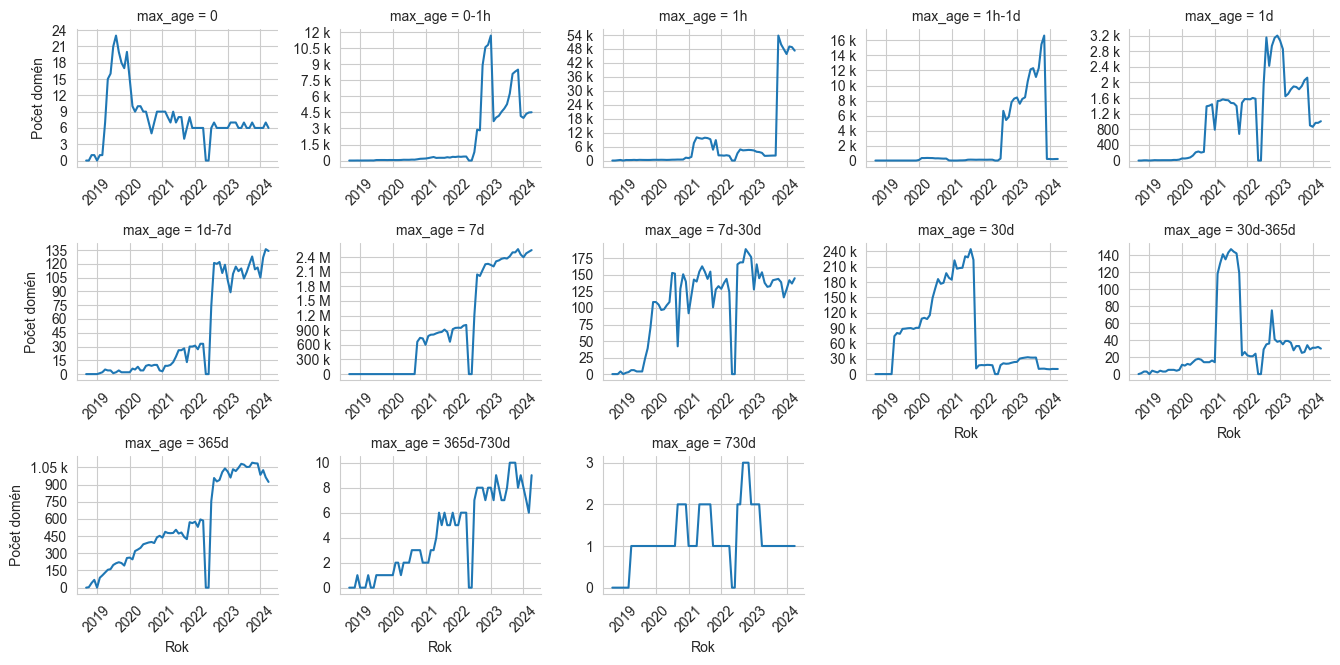

In [10]:
to_plot = ma_result.stack()
to_plot = to_plot.reset_index()
to_plot.rename(columns={'level_0': 'max_age', 'level_1': 'date', 0: 'domain_count'}, inplace=True)

to_plot['date_fmt'] = to_plot['date'].map(lambda date: pd.to_datetime(date))

sns.set_style('whitegrid')

g = sns.relplot(to_plot, kind='line', x='date_fmt', y='domain_count', 
                col='max_age', col_wrap=5, 
                height=2.25, aspect=1.2, 
                facet_kws={'sharey': False, 'sharex': False}
                )

for ax in g.axes:
    ax.xaxis.remove_overlapping_locs = False
    years = mdates.YearLocator()
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

    ax.xaxis.set_minor_locator(ticker.NullLocator())
    

    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))    
    ax.yaxis.set_major_formatter(ticker.EngFormatter())    
    
    ax.tick_params(axis='x', which="major", rotation=45)



g.set_xlabels("Rok")
g.set_ylabels("Počet domén")

# g.figure.suptitle("Nastavenie hodnôt max_age počas skúmaného obdobia")
g.tight_layout()

g.savefig("graphs/httparchive_nel_config_ma_dist.pdf")